## Health Insurance by own

## import Libraries

In [81]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder, StandardScaler

## Load the Data

In [82]:
data = pd.read_csv("insurance.csv")

In [83]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Statistics

In [84]:
data.shape

(1338, 7)

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [86]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Feature Creation

In [87]:
## BMI
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal Weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obese'

data['BMI_Category'] = data['bmi'].apply(categorize_bmi)

In [88]:
## AGE
def categorize_age(age):
    if age < 30:
        return 'Young Adults'
    elif 30 <= age < 50:
        return 'Middle-Aged'
    else:
        return 'Senior Citizens'

data['Age_Group'] = data['age'].apply(categorize_age)

In [89]:
data.head()

,age,sex,bmi,children,smoker,region,charges,BMI_Category,Age_Group
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,Young Adults
1,18,male,33.770,1,no,southeast,1725.55230,Obese,Young Adults
2,28,male,33.000,3,no,southeast,4449.46200,Obese,Young Adults
3,33,male,22.705,0,no,northwest,21984.47061,Normal Weight,Middle-Aged
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,Middle-Aged


## EDA/ Data Visualization

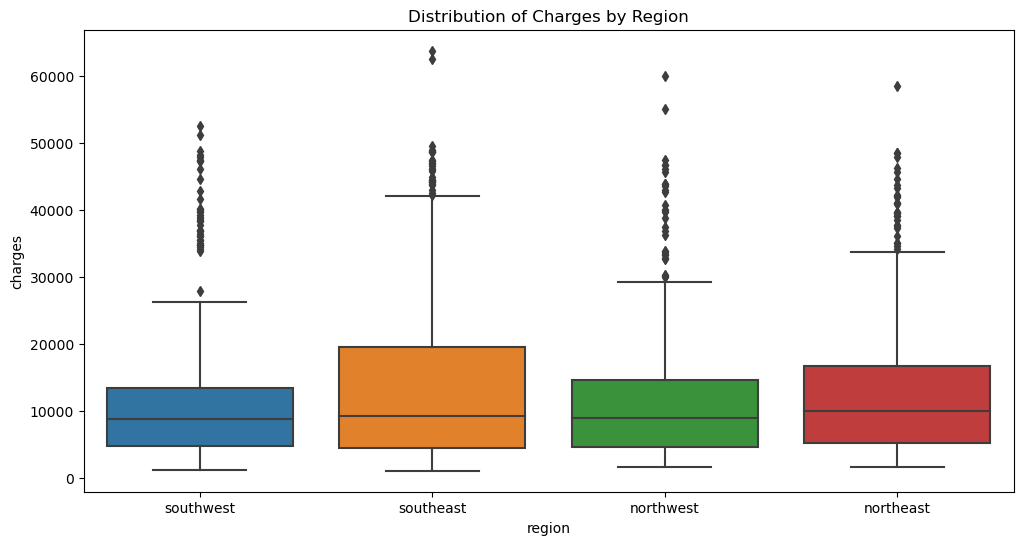

In [90]:
#Data Visualisation
plt.figure(figsize=(12, 6))
sns.boxplot(x='region', y='charges', data=data)
plt.title('Distribution of Charges by Region')
plt.show()


### Histogram Plot for Numerical features

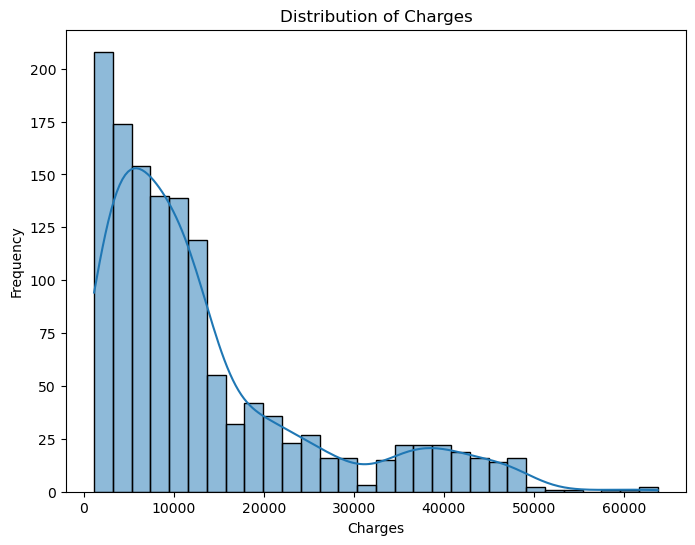

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of a numerical feature (e.g., 'Charges')
plt.figure(figsize=(8, 6))
sns.histplot(data['charges'], kde=True)
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()


### Bar Plot for Categorical Data

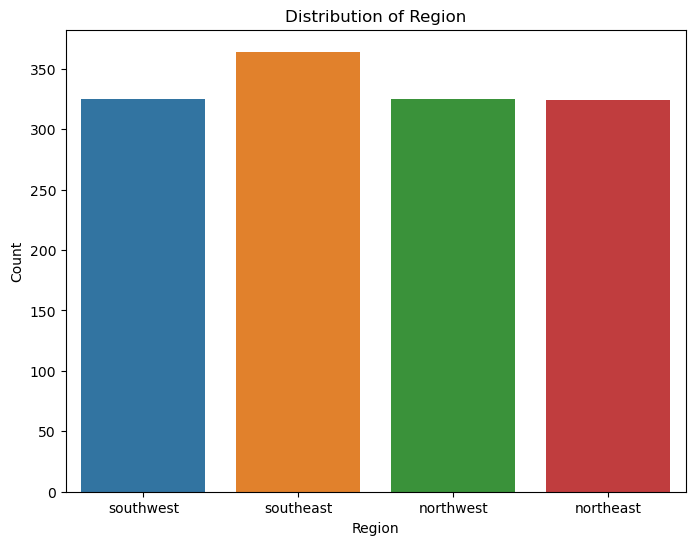

In [92]:
# Create a bar plot to visualize the distribution of a categorical variable ('Region')
plt.figure(figsize=(8, 6))
sns.countplot(x='region', data=data)
plt.title('Distribution of Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()


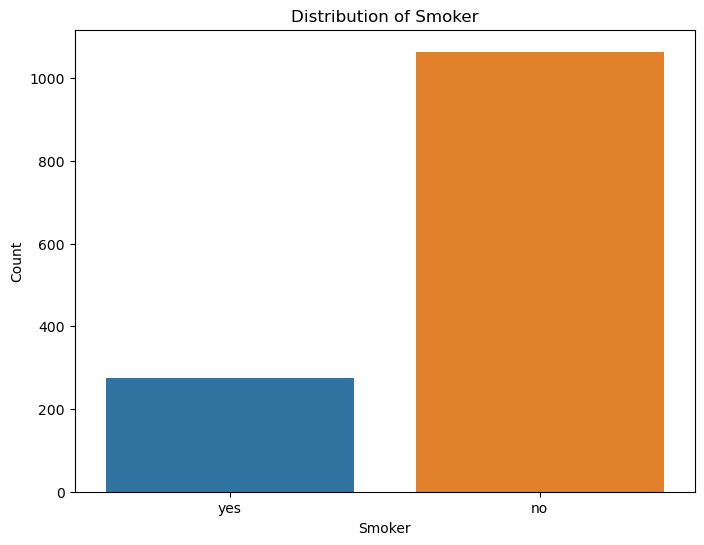

In [93]:
# Create a bar plot to visualize the distribution of a categorical variable (e.g., 'Region')
plt.figure(figsize=(8, 6))
sns.countplot(x='smoker', data=data)
plt.title('Distribution of Smoker')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()


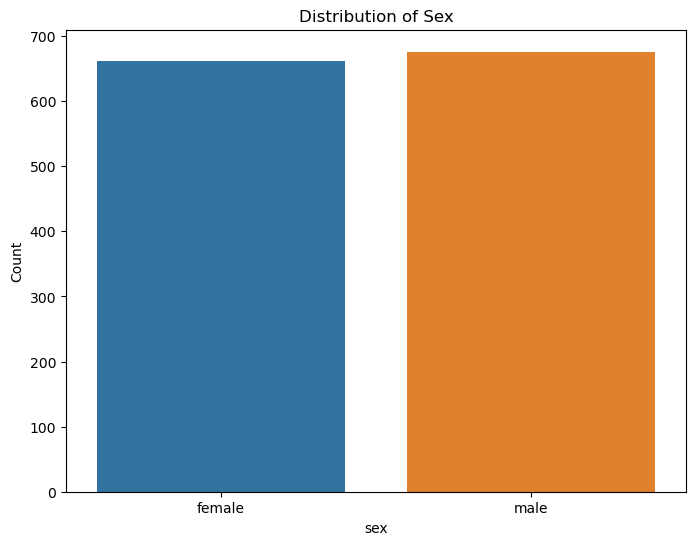

In [94]:
# Create a bar plot to visualize the distribution of a categorical variable (e.g., 'Region')
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=data)
plt.title('Distribution of Sex')
plt.xlabel('sex')
plt.ylabel('Count')
plt.show()


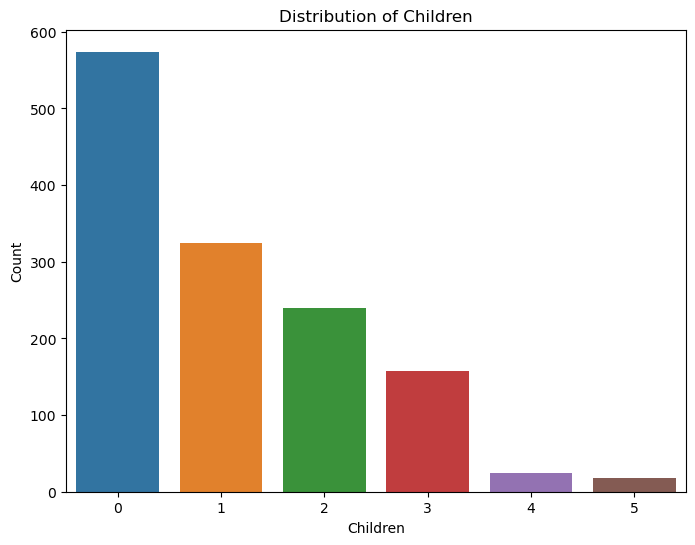

In [95]:
# Create a bar plot to visualize the distribution of a categorical variable ('Region')
plt.figure(figsize=(8, 6))
sns.countplot(x='children', data=data)
plt.title('Distribution of Children')
plt.xlabel('Children')
plt.ylabel('Count')
plt.show()


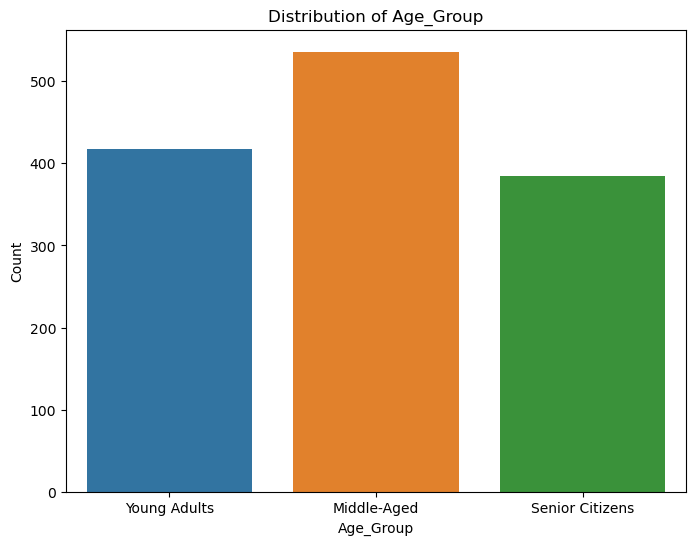

In [96]:
# Create a bar plot to visualize the distribution of a categorical variable ('Region')
plt.figure(figsize=(8, 6))
sns.countplot(x='Age_Group', data=data)
plt.title('Distribution of Age_Group')
plt.xlabel('Age_Group')
plt.ylabel('Count')
plt.show()


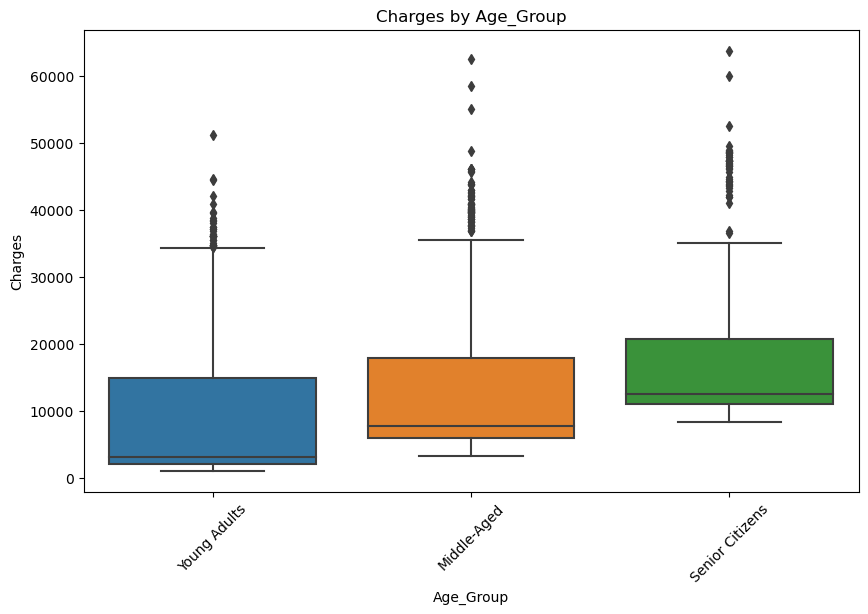

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot to visualize 'Charges' by 'BMI_Category'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_Group', y='charges', data=data)
plt.title('Charges by Age_Group')
plt.xlabel('Age_Group')
plt.ylabel('Charges')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


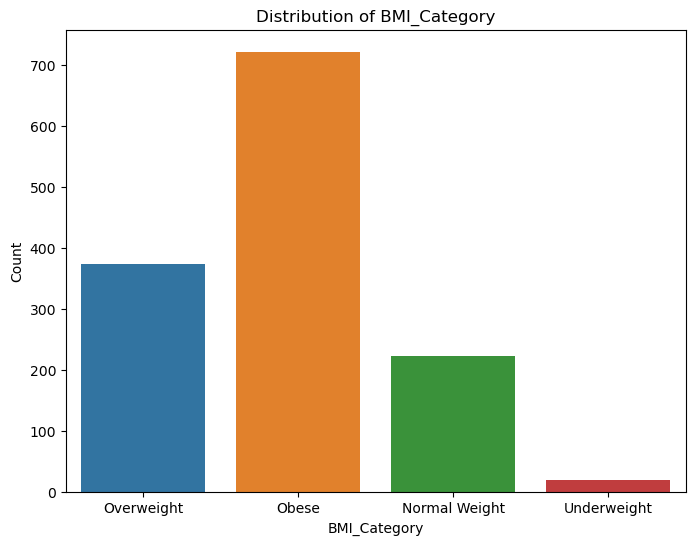

In [98]:
# Create a bar plot to visualize the distribution of a categorical variable ('Region')
plt.figure(figsize=(8, 6))
sns.countplot(x='BMI_Category', data=data)
plt.title('Distribution of BMI_Category')
plt.xlabel('BMI_Category')
plt.ylabel('Count')
plt.show()


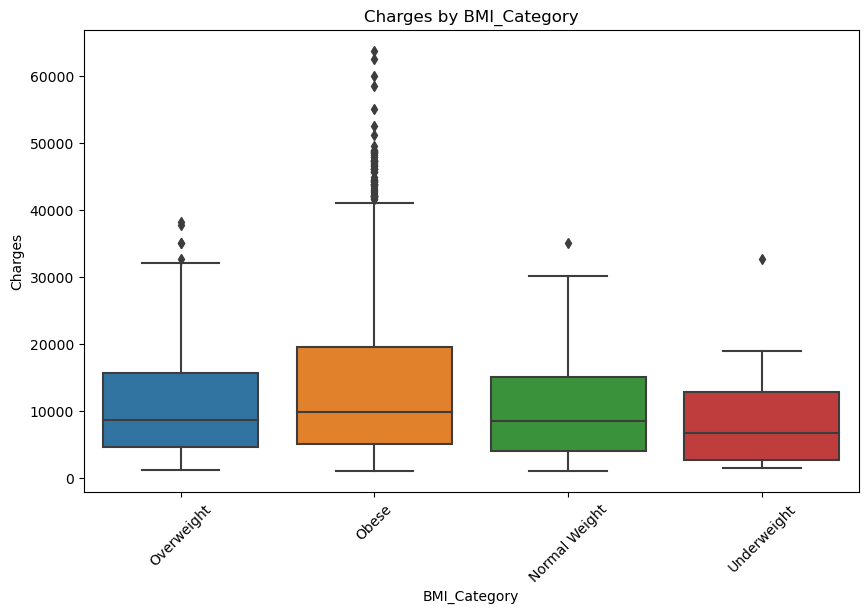

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot to visualize 'Charges' by 'BMI_Category'
plt.figure(figsize=(10, 6))
sns.boxplot(x='BMI_Category', y='charges', data=data)
plt.title('Charges by BMI_Category')
plt.xlabel('BMI_Category')
plt.ylabel('Charges')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


### Correlation Plot

C:\Users\DELL\AppData\Local\Temp\ipykernel_4124\2912208222.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


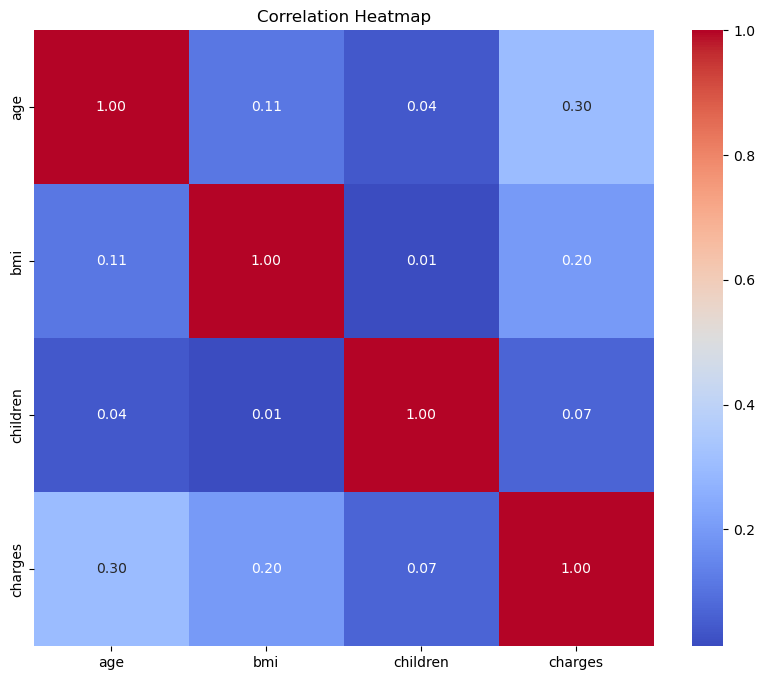

In [100]:
# Create a correlation heatmap to visualize the pairwise correlations between numerical features
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


## Data Preprocessing

In [101]:
#Handle missing value
data.isnull().sum()

age             0
sex             0
bmi             0
children        0
smoker          0
region          0
charges         0
BMI_Category    0
Age_Group       0
dtype: int64

### See Outliers present or not

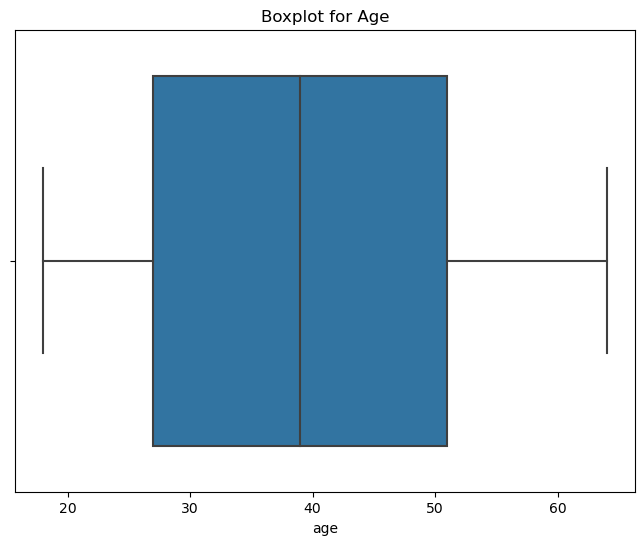

In [102]:
#See Outliers present or not

# Create a boxplot for 'Age' to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['age'])
plt.title('Boxplot for Age')
plt.show()

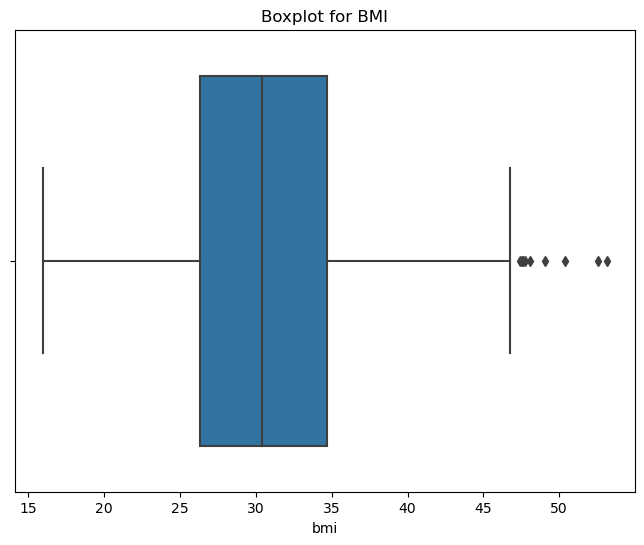

In [103]:
# Create a boxplot for 'BMI'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['bmi'])
plt.title('Boxplot for BMI')
plt.show()

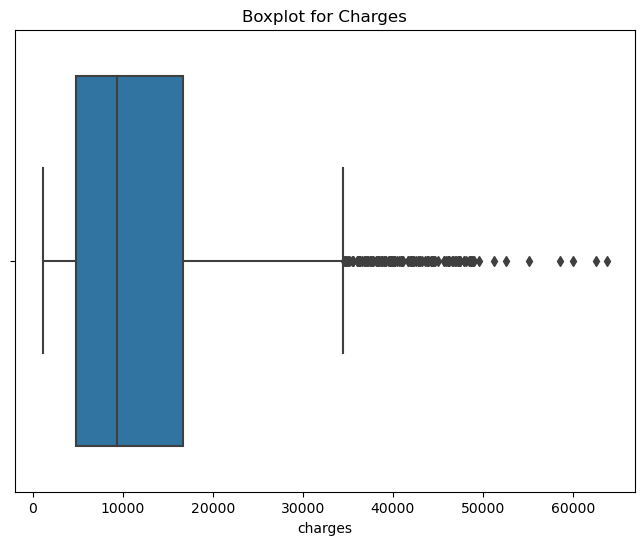

In [104]:
# Create a boxplot for 'Charges'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['charges'])
plt.title('Boxplot for Charges')
plt.show()

### Handle Outlier for BMI

In [105]:
#Outliers
# Detect and handle outliers using the IQR method for 'BMI' feature
Q1 = data['bmi'].quantile(0.25)
Q3 = data['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data = data[(data['bmi'] >= lower_bound) & (data['bmi'] <= upper_bound)]
data

,age,sex,bmi,children,smoker,region,charges,BMI_Category,Age_Group
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,Young Adults
1,18,male,33.770,1,no,southeast,1725.55230,Obese,Young Adults
2,28,male,33.000,3,no,southeast,4449.46200,Obese,Young Adults
3,33,male,22.705,0,no,northwest,21984.47061,Normal Weight,Middle-Aged
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,Middle-Aged
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obese,Senior Citizens
1334,18,female,31.920,0,no,northeast,2205.98080,Obese,Young Adults
1335,18,female,36.850,0,no,southeast,1629.83350,Obese,Young Adults
1336,21,female,25.800,0,no,southwest,2007.94500,Overweight,Young Adults


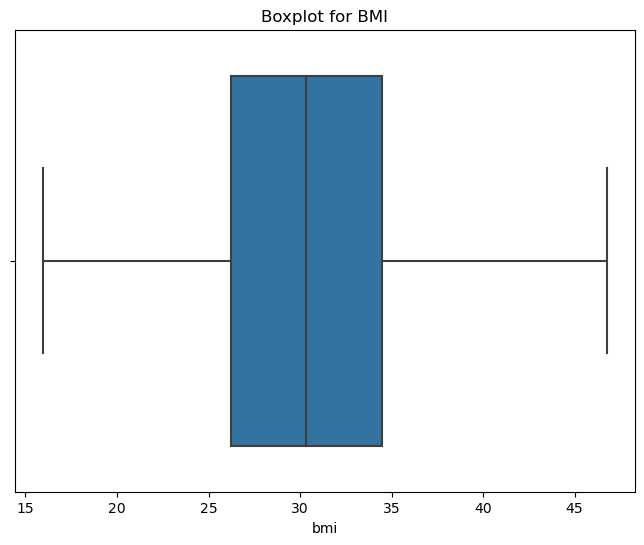

In [106]:
# Create a boxplot for 'BMI'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['bmi'])
plt.title('Boxplot for BMI')
plt.show()

### Encoding

In [107]:
#Encode Categorical Features
label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])

# Encode categorical variables like 'Region' using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['region'], drop_first=False)

data_encoded.head()

,age,sex,bmi,children,smoker,charges,BMI_Category,Age_Group,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,Overweight,Young Adults,0,0,0,1
1,18,1,33.770,1,0,1725.55230,Obese,Young Adults,0,0,1,0
2,28,1,33.000,3,0,4449.46200,Obese,Young Adults,0,0,1,0
3,33,1,22.705,0,0,21984.47061,Normal Weight,Middle-Aged,0,1,0,0
4,32,1,28.880,0,0,3866.85520,Overweight,Middle-Aged,0,1,0,0


In [108]:
df= data_encoded

### Feature Scaling

In [109]:
#Feature Scaling
scaler = StandardScaler()
df[['age', 'bmi', 'children']] = scaler.fit_transform(df[['age', 'bmi', 'children']])

df.head()

,age,sex,bmi,children,smoker,charges,BMI_Category,Age_Group,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,0,-0.445670,-0.907940,1,16884.92400,Overweight,Young Adults,0,0,0,1
1,-1.509976,1,0.546267,-0.079764,0,1725.55230,Obese,Young Adults,0,0,1,0
2,-0.797855,1,0.416149,1.576587,0,4449.46200,Obese,Young Adults,0,0,1,0
3,-0.441794,1,-1.323542,-0.907940,0,21984.47061,Normal Weight,Middle-Aged,0,1,0,0
4,-0.513006,1,-0.280065,-0.907940,0,3866.85520,Overweight,Middle-Aged,0,1,0,0


C:\Users\DELL\AppData\Local\Temp\ipykernel_4124\3202374067.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


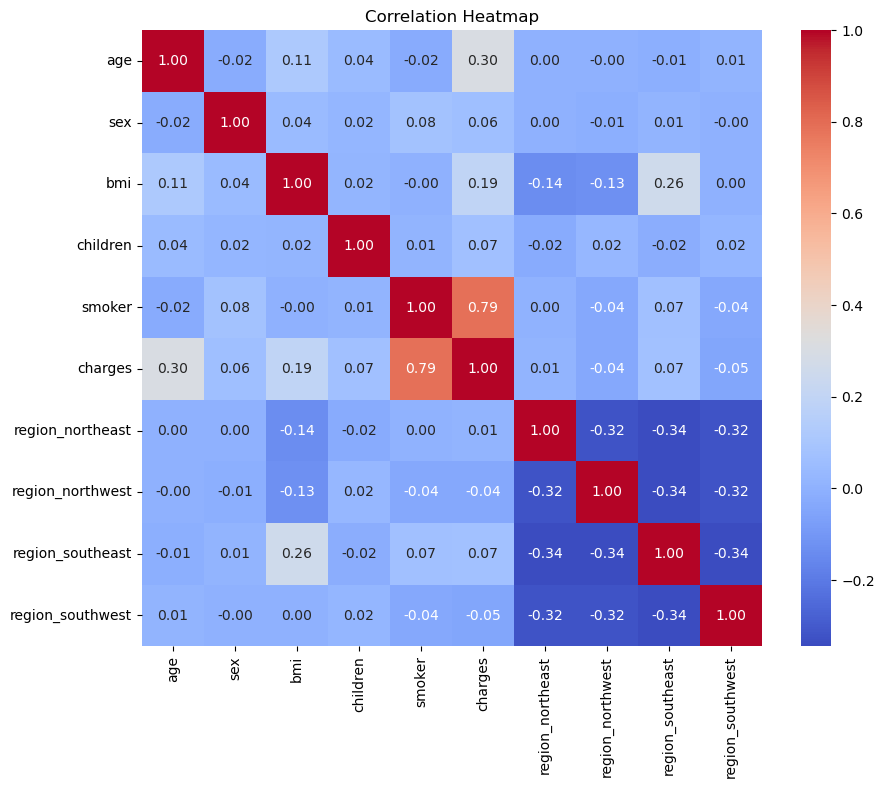

In [110]:
# Create a correlation heatmap to visualize the pairwise correlations between numerical features
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [111]:
#EDA
df.describe()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
count,1.329000e+03,1329.000000,1.329000e+03,1.329000e+03,1329.000000,1329.000000,1329.00000,1329.000000,1329.000000,1329.000000
mean,-2.432633e-16,0.504138,-1.978185e-16,6.950380e-17,0.203913,13212.333374,0.24304,0.244545,0.268623,0.243792
std,1.000376e+00,0.500171,1.000376e+00,1.000376e+00,0.403057,11997.236429,0.42908,0.429979,0.443410,0.429531
min,-1.509976e+00,0.000000,-2.463339e+00,-9.079396e-01,0.000000,1121.873900,0.00000,0.000000,0.000000,0.000000
25%,-8.690668e-01,0.000000,-7.295628e-01,-9.079396e-01,0.000000,4738.268200,0.00000,0.000000,0.000000,0.000000
50%,-1.452106e-02,1.000000,-4.010796e-02,-7.976408e-02,0.000000,9361.326800,0.00000,0.000000,0.000000,0.000000
75%,8.400246e-01,1.000000,6.670902e-01,7.484114e-01,0.000000,16586.497710,0.00000,0.000000,1.000000,0.000000
max,1.765782e+00,1.000000,2.739679e+00,3.232938e+00,1.000000,62592.873090,1.00000,1.000000,1.000000,1.000000


## Split Data into Training and Testing Sets

In [112]:
X = df.drop(columns=['charges','Age_Group', 'BMI_Category'], axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [113]:
print(X.shape, X_train.shape, X_test.shape)

(1329, 9) (1063, 9) (266, 9)


In [114]:
X.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,0,-0.445670,-0.907940,1,0,0,0,1
1,-1.509976,1,0.546267,-0.079764,0,0,0,1,0
2,-0.797855,1,0.416149,1.576587,0,0,0,1,0
3,-0.441794,1,-1.323542,-0.907940,0,0,1,0,0
4,-0.513006,1,-0.280065,-0.907940,0,0,1,0,0


## Model Development

In [115]:
##Libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor

In [36]:
## Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_linear = model.predict(X_test)

In [37]:
## Random Forest

rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

In [38]:
## SVR

svr_reg = SVR(kernel='linear', C=1.0)
svr_reg.fit(X_train, y_train)
y_pred_svr = svr_reg.predict(X_test)

In [39]:
## GB

gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_reg.fit(X_train, y_train)
y_pred_gb = gb_reg.predict(X_test)

In [40]:
## Decision Tree

dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)

In [41]:
## KNN

knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
y_pred_knn = knn_reg.predict(X_test)

### Model Evaluation

In [42]:
##Libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [43]:
#Model Evaluation
# Calculate metrics for each model
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(mae_linear, mse_linear, r2_linear)

4044.6328726120687 33542595.302794 0.7081108132669856


In [44]:
# Models Function
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors Regression': KNeighborsRegressor(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Ada Boosting Regression' : AdaBoostRegressor()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'Model: {model_name}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Mean Squared Error (MSE): {mse:.2f}')
    print(f'R-squared (R2): {r2:.2f}')
    print('-' * 40)



Model: Linear Regression
Mean Absolute Error (MAE): 4044.63
Mean Squared Error (MSE): 33542595.30
R-squared (R2): 0.71
----------------------------------------
Model: Random Forest Regression
Mean Absolute Error (MAE): 2811.58
Mean Squared Error (MSE): 24046887.61
R-squared (R2): 0.79
----------------------------------------
Model: Gradient Boosting Regression
Mean Absolute Error (MAE): 2568.22
Mean Squared Error (MSE): 20237611.93
R-squared (R2): 0.82
----------------------------------------
Model: Support Vector Regression
Mean Absolute Error (MAE): 7552.38
Mean Squared Error (MSE): 122006117.95
R-squared (R2): -0.06
----------------------------------------
Model: K-Nearest Neighbors Regression
Mean Absolute Error (MAE): 3933.74
Mean Squared Error (MSE): 39326546.55
R-squared (R2): 0.66
----------------------------------------
Model: Decision Tree Regression
Mean Absolute Error (MAE): 3038.35
Mean Squared Error (MSE): 41724385.18
R-squared (R2): 0.64
---------------------------------

## Hyperparameter Tuning

In [45]:
#libraries
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

### Random Forest Hyperparameter Tuning

In [79]:
# Hyperparameter grid for Random Forest
rf_param_random = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}


In [ ]:
# Randomized Search for Random Forest
rf_random_search = RandomizedSearchCV(
    RandomForestRegressor(), rf_param_random, 
    n_iter=50, cv=5, random_state=42, n_jobs=-1, verbose=1)
rf_random_search.fit(X_train, y_train)

print(rf_random_search.best_params_)
print(rf_random_search.best_score_)
print(rf_random_search.best_estimator_)

In [ ]:
# Grid Search for Random Forest
rf_grid_search = GridSearchCV(
    RandomForestRegressor(),
    rf_param_grid, cv=5, n_jobs=-1, verbose=1)
rf_grid_search.fit(X_train, y_train)


In [ ]:
print(rf_grid_search.best_params_)
print(rf_grid_search.best_score_)
print(rf_grid_search.best_estimator_)

In [ ]:
# Evaluate the Random Forest models
rf_best_model = rf_grid_search.best_estimator_
rf_predictions = rf_best_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f'Random Forest - MAE: {rf_mae:.2f}, MSE: {rf_mse:.2f}, R2: {rf_r2:.2f}')

In [117]:
rf_final = RandomForestRegressor(bootstrap=True, max_depth=15, max_features='auto', min_samples_leaf=5, min_samples_split=2,
                                n_estimators=250)

rf_final.fit(X,y)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=15, max_features='auto', min_samples_leaf=5,
                      n_estimators=250)

In [78]:
X.shape

(1329, 9)

In [76]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1329, dtype: float64

In [71]:
## Save the Model Using Joblib

gb= GradientBoostingRegressor(learning_rate=0.01, max_depth=3,
                              min_samples_leaf=6,n_estimators=400, 
                              subsample=0.9, min_samples_split= 7)
gb.fit(X,y)

GradientBoostingRegressor(learning_rate=0.01, min_samples_leaf=6,
                          min_samples_split=7, n_estimators=400, subsample=0.9)

In [118]:
import joblib
joblib.dump(rf_final, 'rf_final.pkl')

#model= joblib.load('model_joblib_gb')
#model.predict(X)

['rf_final.pkl']

## Streamlit App

### Define a Streamlit app
st.title('Medical Insurance Cost Prediction')
st.sidebar.header('User Input')

### Collect user input
age = st.sidebar.slider('Age', 18, 65, 30)
sex = st.sidebar.selectbox('Sex', ['Male', 'Female'])
bmi = st.sidebar.number_input('BMI', min_value=15.0, max_value=50.0, value=25.0)
children = st.sidebar.slider('Children', 0, 5, 0)
smoker = st.sidebar.selectbox('Smoker', ['Yes', 'No'])
region = st.sidebar.selectbox('Region', ['southwest', 'southeast', 'northwest', 'northeast'])

### Encode user input
sex = label_encoder.transform([sex])[0]
smoker = label_encoder.transform([smoker])[0]
region = label_encoder.transform([region])[0]

### Create a DataFrame for user input
user_input = pd.DataFrame({'Age': [age],
                            'Sex': [sex],
                            'BMI': [bmi],
                            'Children': [children],
                            'Smoker': [smoker],
                            'Region': [region]})

### Scale user input
user_input[['age', 'bmi']] = scaler.transform(user_input[['age', 'bmi']])

### Make predictions
predicted_charges = model.predict(user_input)

### Display the result
st.subheader('Insurance Cost Prediction:')
st.write(f'The estimated insurance cost is ${predicted_charges[0]:.2f}')


streamlit run your_app.py #Run the Streamlit App

## Save the Model Using Joblib

rf= RandomForestRegressor()
rf.fit(X,y)

import joblib
joblib.dump(rf, 'model_joblib_rf')

model= joblib.load('model_joblib_rf')
model.predict(df)

## Streamlit

import streamlit as st
import joblib

def main():
    html_temp=""""
    <div style= "background-color: lightblue; padding: 16px">
    <h2 style= "color: black"; text-aligin: center> Health Insurance Cost Prediction
    </div>
    """
    
    st.markdown(html_temp, unsafe_allow_html= True)
    
    model= joblib.load('model_joblib_rf')
    
    p1= st.slider('Enter Your Age', 18,100)
    
    s1= st.selectbox('Sex',('Male', 'Female'))
    
    if s1=='Male':
        p2=1
    else:
        p2=0
        
    p3= st.number_input("Enter Your BMI Value")
    
    p4= st.slider("Enter Number of Children", o,5)
    
    s2= st.selectbox("Smoker", ("Yes","No"))
    
    if s2=='Yes':
        p5=1
    else:
        p5=0
    
    p6= st.slider("Enter Your Region",0,3)
    
    if st.button('Predict'):
        pred= model.predict([[p1,p2,p3,p4,p5,p6]])
        
        st.balloons()
        st.success("Your Insurance Cost is {}".format(round(pred[0],2)))
    
if __name++ == '__main__' :
    main()

In [79]:
import pickle
pickle.dump(gb,open("gb.pkl","wb"))

In [80]:
pickle.dump(X,open("df.pkl","wb"))